In [3]:
# standard
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from numpy.random import randn

#stats
from scipy import stats

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
dataset = randn(25)

(0, 1)

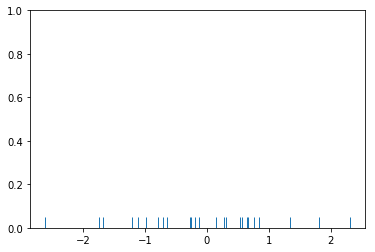

In [6]:
sns.rugplot(dataset)

plt.ylim(0,1)

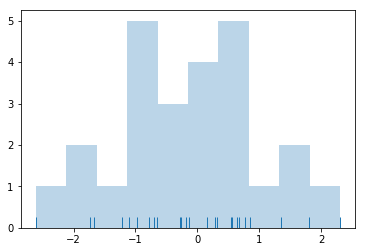

In [7]:
plt.hist(dataset,alpha=0.3) #alpha for transparency
sns.rugplot(dataset)

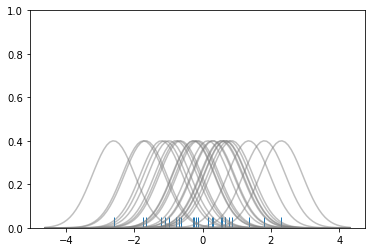

In [8]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)
#bandwidth from wikipedia
bandwidth = ( (4*dataset.std()**5)/(3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    #create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
    plt.ylim(0,1)


Text(0.5,0.98,'sum of all basis function')

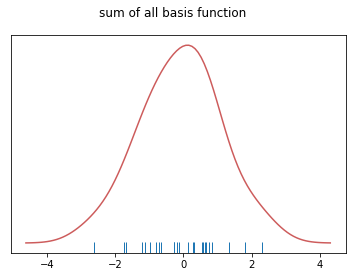

In [9]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color = 'indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("sum of all basis function")

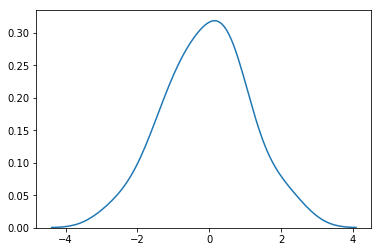

In [10]:
sns.kdeplot(dataset)

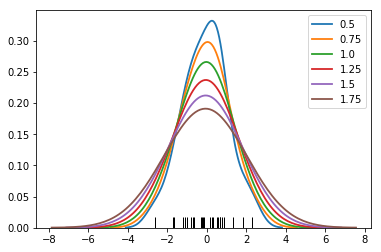

In [11]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

In [12]:
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

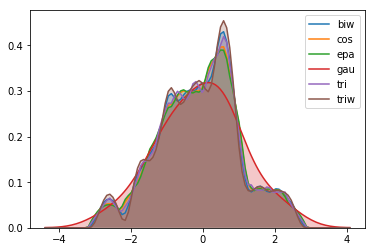

In [14]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

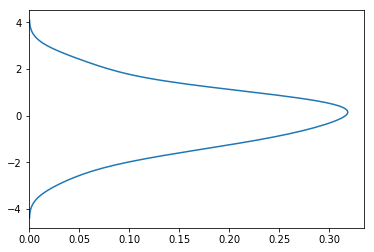

In [15]:
sns.kdeplot(dataset,vertical = True)

In [16]:
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

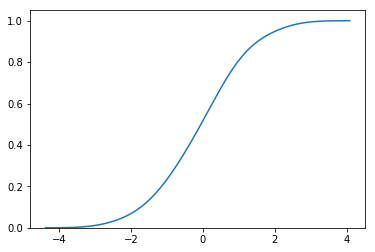

In [17]:
sns.kdeplot(dataset,cumulative = True)

C:\Users\swapn\Anaconda2\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


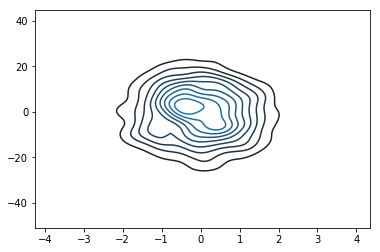

In [18]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(dframe)

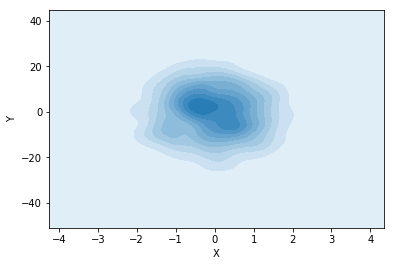

In [21]:
sns.kdeplot(dframe.X,dframe.Y, shade= True)

C:\Users\swapn\Anaconda2\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


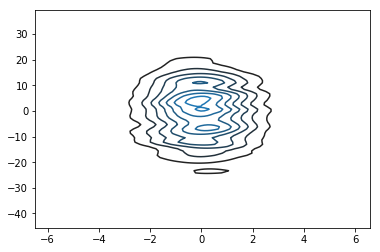

In [22]:
sns.kdeplot(dframe,bw=1)

C:\Users\swapn\Anaconda2\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


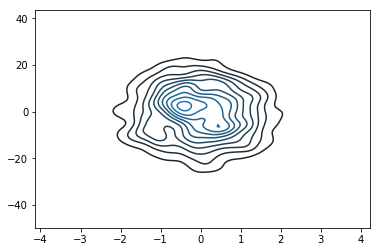

In [23]:
sns.kdeplot(dframe,bw='silverman')

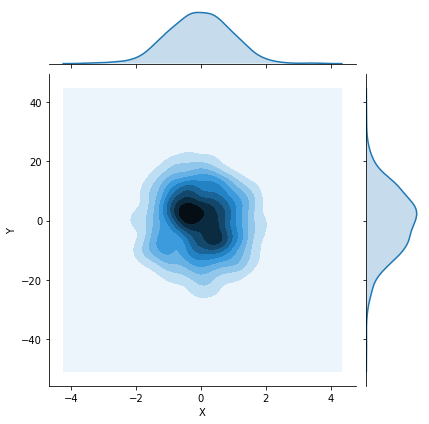

In [24]:
sns.jointplot('X','Y',dframe,kind = 'kde')